## Modules

For this experiment, Python will be used with the following modules:
* Pandas
    + To tabulate results, and calculations in a csv format
* Matplotlib
	+ For visualization of the algorithm results performance
* Numpy & Random
    + For the generation of random values
* Os
    + To select the workspace path where the problem instance library is located

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy
import os

## Localizes the Knapsack Instances Library

In [45]:
os.chdir(r"C:\Users\xedua\OneDrive\Escritorio\MCC-I\Semester_2\Research\KP instances")

## Generator/Selector of PIs

Description of the **_«instances»_** function:

* The purpose of this function is to either return a tuple with problem instance objects (inside tuples) from the library with its knapsack limit, or to generate a random problem instance with objects of weight ∈ (1, 15) and value ∈ (1, 1/3 * knapsack limit)

* **_Parameters_**

    + number_objects: _Integer_
        - The amount of available objects that will contain the problem instance 
    + k_limit: Integer
        - The maximum units that a knapsack solution can contain
* **_Returns_**
    + PI: _List of tuples with integers_
        - Either the generated or the library selected problem instance, each object is a tuple of (profit, weight)
    + k_limit: _Integer_
        - Either the originally specified knapsack limit or the knapsack limit selected from the problem instance library

In [46]:
# Generator/Selector of PIs
def instances(number_objects, k_limit):
    if k_limit != 0: # When knapsack limit is defined, instances are generated
        PI = []
        for element in range(number_objects):
            PI.append((random.randint(1.0, 15.0), random.randint(1, k_limit//3))
            ) # Objects ∈ [value (1, 15), weight (1, 1/3kp)]
        return PI, k_limit
    else: # When knapsack limit undefined, an instance from the library is used
        fileName = "ks_" + str(number_objects) + "_0" # Introduces the number of
        # objects into the filename that will be requested from the library
        f = open(fileName, "r") # Opening, reading, and cleaning the instance
        lines = f.readlines()
        line = lines[0].split(",")
        nbItems = int(line[0].strip())
        k_limit = int(line[1].strip())
        PI = [None] * nbItems
        for i in range(0, nbItems):
            line = lines[i + 1].split(",")
            weight = int(line[0].strip())
            profit = float(line[1].strip())
            PI[i] = (profit, weight) # Saves objects as (profit, weight)
        return PI, k_limit # Returns the instance and the knapsack limit 

# Cellular Automata

Description of the **_«CA»_** function:

* The purpose of this function is to return one generation from the one dimensional Cellular Automata as a list of 0s and 1s, that represent the solution for the given problem instacne

* **_Parameters_**

    + rules: _List of lists_
        - The configuration of three neighborhood cells that will produce a cell 
    + PI: _List of tuples with integers_
        - The either generated or selected problem instance from the **_«instances»_** 
* **_Returns_**
    + result: _List with integers_
        - A list of 0s and 1s that represent an actual solution for the knapsack problem instance

In [47]:
# Cellular Automata Solution Generator
def CA(rules, PI):
    initial_states = [] 
    rules_outcome = []
    number_rules = len(rules)
    neighborhood = len(rules[0])
    number_kp_items = len(PI)
    for element in range(number_kp_items): # Appends the PI len number of zeros
        if element == number_kp_items // 2 - 1:
            initial_states.append(1) # The initial state, middle active cell
        else: # For example in a PI of size 7, the initial is: [0 0 0 1 0 0 0]
            initial_states.append(0) 
    for element in range(number_rules): # Appends a 1s set for the rules outcome
        rules_outcome.append(1)
    generations = 1 # Defines the number of generations that will be produced, 
    rows = generations + 1 # The rows are the initial state and the result
    columns = len(initial_states) # The columns num are the kp availablr items
    canvas = numpy.zeros([rows, columns]) # Creates the array for the CA
    for i in range(len(initial_states)): 
        canvas[0, i] = initial_states[i] # Places the parent in the CA array
    for i in range(rows - 1): #  Iterates the whole canvas
        for j in range(columns):
            for k in range(number_rules):
                if numpy.array_equal(rules[k], canvas[i, j:(j + neighborhood)]): 
                    # Compares with the rules, when it matches...
                    canvas[i + 1, j + 1] = rules_outcome[k] # ...substitutes the
                    # canvas with the outcome
    # In case each CA solution needs to be visualize
    #plt.imshow(canvas[:, 0:columns], cmap='Greys', interpolation='nearest')
    result = []
    for element in canvas[1:].tolist()[0]: # The zero makes it return each 
        # element not the whole list
        result.append(element) # Appends the new generation, the solution
    return result # Returns the solution

# Individual Initialization

Description of the **_«createIndividual»_** function:

* The purpose of this function is to return a defined amount of random binary numbers that represent a set of rules.

* **_Parameters_**
    + rules_digits: _Integer_
        - Is the number of digits that will contain all the rules in total
* **_Returns_**
    + A list of 0s and 1s that represent the total numbers that represent the rules that will produce a solution in the Cellular Automata

In [48]:
# Individual initialization
def createIndividual(rules_digits): # Receives the required number of random 
  # binary-numbers to generate
  return numpy.random.randint(0, 2, rules_digits) # Returns the generated random
  # binary-numbers

# Rules Splitter

Description of the **_«rules_splitter»_** function
* The purpose of this function is to split the generated rules from 

* **_Parameters_**
    + rules: _List of integers_
        - The list of 0s and 1s that form all the rules
    + size_rules: _Integer_
        - The size or length of each rule, it determines how many numbers each sublist will contain 
* **_Returns_**
    + new_rules: _List of lists_
        - The specified number of generated rules with the already specified length.  

In [49]:
# Rules Splitter
def rules_splitter(rules, size_rules):    
    start = 0
    end = len(rules)
    step = size_rules
    new_rules = []
    for i in range(start, end, step): # Breaks the 0s and 1s in sublists of 
        # 'size' length
        x = i
        new_rules.append(rules[x : x + step])
    return new_rules

# Recombination

Description of the **_«combine»_** function
* The purpose of this function is to recombine two individual rules sets to produce one recombined set

* **_Parameters_**
    + parentA: _List of integers_
        - The amount of rules that are to be generated
    + parentB: _List of integers_
        - The size or length of each rule, it determines how many numbers each sublist will contain
    + cRate: _Decimal number_ 
        - The rate at which the parent rule will be recombined, when the random number is smaller or equal to this rate, then recombination occurs.
* **_Returns_**
    + offspring: _List of integers_
        - The recombined rules, produced from the parent rule

In [50]:
# Recombination
def combine(parentA, parentB, cRate): # Receives two parents and a crossov. rate
  if (random.random() <= cRate): # Compares crossover rate with random rate, in 
    # case the cRate is larger or equal,  executes:
    cPoint = numpy.random.randint(1, len(parentA)) # Creates a random number
    # between 1 and the parents length for the crossover point
    offspringA = numpy.append(parentA[0:cPoint], parentB[cPoint:]) # Joins 
    # splitted parents at the crosspoint as the offspring
    offspringB = numpy.append(parentB[0:cPoint], parentA[cPoint:])
  else:
    offspringA = numpy.copy(parentA) # Copies the whole parent as the offspring 
    # when the crossover rate is smaller not equal to the random rate 
    offspringB = numpy.copy(parentB) 
  return offspringA, offspringB

# Mutation

Description of the **_«mutation»_** function
* The purpose of this function is to mutate an individual rule
* **_Parameters_**
    + individual: _List of integers_
        - An individual rule set from the population
    + MRate: _Decimal number_ 
        - The rate at which the parent rules will be mutated, when the random number is smaller or equal to this rate, then recombination occurs.
* **_Returns_**
    + individual: _List of integers_
        - The mutated rules produced from the parent rule

In [51]:
# Mutation operator
def mutate(individual, mRate): # Receives the mutation rate and an individual
  # (Set of random numbers between 0-1)
  for i in range(len(individual)): # Iterates the numbers from 0 to the
    # length of the individual
    if (random.random() <= mRate): # Compares mutation rate with random rate, in 
      # case the mRate is larger or equal executes:
      individual[i] = not(individual[i]) # Switches 0s for 1s and 1s for 0s
  return individual

# Evaluation

Description of the **_«evaluator»_** function
* The purpose of this function is to evaluate the performance of the solution, it returns a tuple with the (total profit, total weight, state of the knapsack).

* **_Parameters_**
    + PI: _List of tuples with integers_
        - The either generated or selected problem instance from the **_«CA»_** function
    + Solution: _List of integers_
        - A random list with numbers ∈ (0, 1) ∨ (Outside Knapsack, Inside Knapsack) from the **_«solver»_** function
            - Each number makes reference to each object from the problem instance
    + k_limit: _Integer_
        - Either the originally specified knapsack limit or the knapsack limit selected from the problem instance library, from the **_«instances»_** function
* **_Returns_**
    + s1: _Tuple with integers_
        - A tuple with the total profit, total weight, and the state of the knapsack which may be 0 or 1
        

In [52]:
# Evaluator of Solutions
def evaluator(PI, individual_rules_set, k_limit, size_rules):
    s1 = (0, 0, 0)
    rules = rules_splitter(individual_rules_set, size_rules) # Splits in sublist
    individual_solution = CA(rules, PI)
    for i in range(len(PI)): # Iterates all the objects in the problem instance
        if individual_solution[i] == 1: # When the object is in the knapsack considers the 
            # object in the evaluation
            s1 = (s1[0] + PI[i][0], s1[1] + PI[i][1]) # Sums up the profit and 
            # the weight of all the items
    if s1[1] <= k_limit: # When the knapsack is not broken saves a record of 0
        s1 = (s1[0], s1[1], 0)
    else:
        s1 = (s1[0], s1[1], 1) # When the knapsack is broken saves a record of 1
    return s1, individual_solution

# Tournament Selection

Description of the **_«tournament»_** function
* The purpose of this function is to conduct a competition between rules, to determine, which set of rules produces the best solution.

* **_Parameters_**
    + population: _List of lists with integers_
        - The set of rules that produce a particular solution from the **_«geneticAlgorithm»_** function
    + evaluation: _List of tuples_
        - A list that contains the evaluations for multiple solutions in tuples, constructed in the **_«evaluator»_** function and appended as a list in the **_«geneticAlgorithm»_** function
    + tsize: _Integers_
        - The amount of individual rule sets that are to be introduced in a tournament 
* **_Returns_**
    + population[winner]: _List of integers_
        - A list that contains the set of rules that construct the best solution from the tournament participants

In [53]:
# Tournament selection # It was changed
def select(population, evaluation, tSize):
  winner = numpy.random.randint(0, len(population)) # Assigns as the winner a 
  # random number (index) between 0 and the length of the population
  for i in range(tSize - 1): # Iterates from 0 to the tournament size minus 1
    rival = numpy.random.randint(0, len(population)) # Assigns as the rival a 
    # random number (index) between 0 and the length of the population
    if (evaluation[rival][0] > evaluation[winner][0]): # When the rival 
      # value/profit is larger than the winner value/profit executes:
      winner = rival # Assigns the rival index as the winner
  return population[winner] # Returns the winner of the population

# Dooming of Individuals

Description of the **_«extinguish»_** function
* The purpose of this function is to discard all the individual rule sets, evaluations and CA solutions when they break the knapsack.

* **_Parameters_**
    + population: _List of lists with integers_
        - The set of rules that produce a particular solution from the **_«geneticAlgorithm»_** function 
    + evaluation: _List of tuples_
        - A list that contains the evaluations for multiple solutions in tuples, constructed in the **_«evaluator»_** function and appended as a list in the **_«geneticAlgorithm»_** function
    + CApopulation: _Integers_
        - The solutions produced from the generated rules in the **_«CA»_** function
    + k_limit: _Integers_
        - Either the originally specified knapsack limit or the knapsack limit selected from the problem instance library, from the **_«instances»_** function
* **_Returns_**
    + The cleaned sets of
        - population
        - evaluation
        - CApopulation

In [54]:
# Dooming of individuals
def extinguish(population, evaluation, CApopulation, k_limit):
    index_list = []
    for i in range(len(evaluation)):
        if evaluation[i][1] > k_limit: # When the evaluation breaks the knapsack
            # records the index value in a list
            index_list.append(i)
    for index in sorted(index_list, reverse = True): # Iterates the indexes
        # backwards to delete from the higher index to the lowest, and avoid
        # overlapping
        del population[index]
        del evaluation[index]
        del CApopulation[index]
    return population, evaluation, CApopulation

# Evolutionary Process

Description of the **_«geneticAlgorithm»_** function
* The purpose of this function is to execute the evolutionary algorithm by calling the required functions

* **_Parameters_**
    + PI: _List of tuples with integers_
        - The either generated or selected problem instance from the **_«CA»_** function 
    + population_size: _Integer_
        - Number of populations that are requested to be generated in the evolutionary process
    + generations: _Integer_
        - Number of generations that are requested to be generated in the evolutionary process
    + cRate: _Decimal number_ 
        - The rate at which the parent rule will be recombined, when the random number is smaller or equal to this rate, then recombination occurs.
    + MRate: _Decimal number_ 
        - The rate at which the parent rules will be mutated, when the random number is smaller or equal to this rate, then recombination occurs.
    + k_limit: _Integers_
        - Either the originally specified knapsack limit or the knapsack limit selected from the problem instance library, from the **_«instances»_** function
    + size_rules: _Integer_
        - The size or length of each rule, it determines how many numbers each sublist will contain, from **_rules_splitter:**
    + number_rules: _Integer_
        - The amount of rules that are to be generated, in **_rules_splitter_**
* **_Returns_**
    + bestIndividual:
        - The set of rules that produce the best solution in the Cellular Automata
    + bestEvaluation
        - The evaluation in terms of profit, weight, and state of the knapsack from the best set of rules that produces such solution
    + bestCAIndividual
        - The best produced solution obtained from the selected set of rules
    + evaluation
        - The evaluation for the whole population that was selected during the evolutionary process

In [55]:
# Evolutionary Process, Genetic Algorithm
from numpy import delete
def geneticAlgorithm(PI, population_size, generations, cRate, mRate, k_limit, 
  size_rules, number_rules):
  rules_digits = size_rules*number_rules
  population = []
  CApopulation = []
  evaluation = []
  noneindexes = []
 
  for i in range(population_size):
    population.append(createIndividual(rules_digits))
    evaluation.append(evaluator(PI, population[i], k_limit, size_rules)[0])
    CApopulation.append(evaluator(PI, population[i], k_limit, size_rules)[1])
  
  population, evaluation, CApopulation = extinguish(population, evaluation,
  CApopulation, k_limit) # Kills the indivuals that exceed the k_limit size
  population_size = len(population)
  
  # Keeps a record of the best individual found so far
  index = 0;
  for i in range(1, population_size):
    if (evaluation[i][0] > evaluation[index][0]):
      index = i;
  bestIndividual = population[index]
  bestCAIndividual = CApopulation[index]
  bestEvaluation = evaluation[index][0]
  best_Whole_Evaluation = evaluation[index]
  
  # Keeps the information for plotting the performance of the algorithm
  best = [0] * generations
  avg = [0] * generations

  # Runs the evolutionary process
  for i in range(generations):
    newPopulation = []
    # Crossover
    for j in range(population_size // 2):
      parentA = select(population, evaluation, 3)
      parentB = select(population, evaluation, 3)
      offspring1, offspring2 = combine(parentA, parentB, cRate)
      newPopulation.append(offspring1)
      newPopulation.append(offspring2)
    population = newPopulation
    population_size = len(population)
    # Mutation
    noneindexes = []
    for j in range(population_size):
      population[j] = mutate(population[j], mRate)
      evaluation[j] = evaluator(PI, population[j], k_limit, size_rules)[0]
      CApopulation[j] = evaluator(PI, population[j], k_limit, size_rules)[1]
    population, evaluation, CApopulation = extinguish(population, evaluation, 
    CApopulation, k_limit) # Kills the indivuals that exceed the k_limit size
    population_size = len(population)
    for j in range(population_size):
      # Keeps a record of the best individual found so far
      if (evaluation[j][0] > bestEvaluation):
        bestEvaluation = evaluation[j][0]
        bestIndividual = population[j]
        bestCAIndividual = CApopulation[j]
        best_Whole_Evaluation = evaluation[j]
      best[i] = bestEvaluation
      avg[i] = numpy.average([item[0] for item in evaluation])
  plt.plot(range(generations), best, label = "Best")
  plt.plot(range(generations), avg, label = "Average")
  plt.legend()
  plt.title("GA Run")
  
  os.chdir(r"C:\Users\xedua\OneDrive\Escritorio\MCC-I\Semester_2\Research\Results")
  plt.savefig(f'Results_GACA_KPI_{len(PI)}_{k_limit}_Rules_{number_rules}_Size_{size_rules}',
  transparent = False, dpi = 300)
  plt.show()
  plt.close()
  os.chdir(r"C:\Users\xedua\OneDrive\Escritorio\MCC-I\Semester_2\Research\KP instances")
  
  print(f'The maximum knapsack weight limit is: {k_limit}')
  # Returns the best individual found so far
  return bestIndividual, bestEvaluation, bestCAIndividual, best_Whole_Evaluation

# Execution of runs

* Characteristics of the solution model:
    + Solutions are generated with the Cellular Automata with the genetically selected rules
    + The neighborhood is of 3
    + The generated, not library selected objects weight from the problem instances do not exceed 1/3 the knapsack limit, and are not less than 1
    + The generated, not library selected objects profit from the problem instances does not exceed 15 units or are less than 1

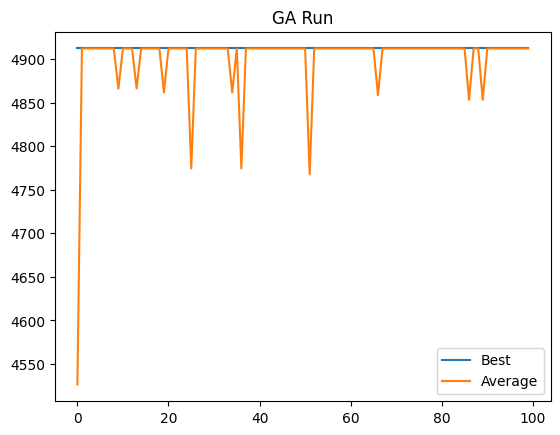

The maximum knapsack weight limit is: 31181
The maximum knapsack weight limit is:
31181
The solution is:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
The total profit is:
4912.0
(4912.0, 12924, 0)


In [56]:
PIs, k_limit = instances(19, 0)
#(PIs, population_size, generations, cRate, mRate,k_limit, size_rules, num_rule)
bestRule, bestEval, bestSol, wholeEval = geneticAlgorithm(PIs, 100, 100, 0.001,
0.001, k_limit, 3, 8) 
print('The maximum knapsack weight limit is:')
print(k_limit)
print('The solution is:')
print(bestSol)
print('The total profit is:')
print(bestEval)
print(wholeEval)

# Generator of solutions for multiple problem instances

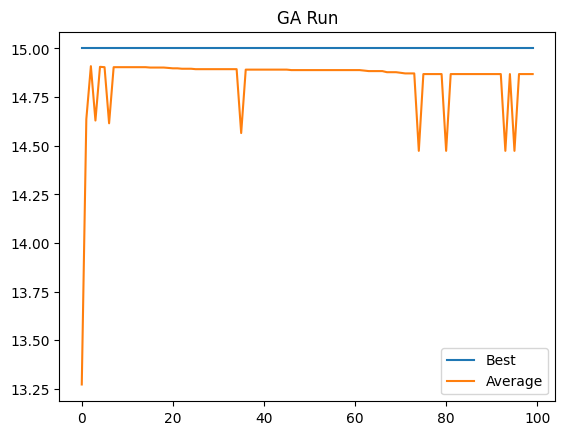

The maximum knapsack weight limit is: 11


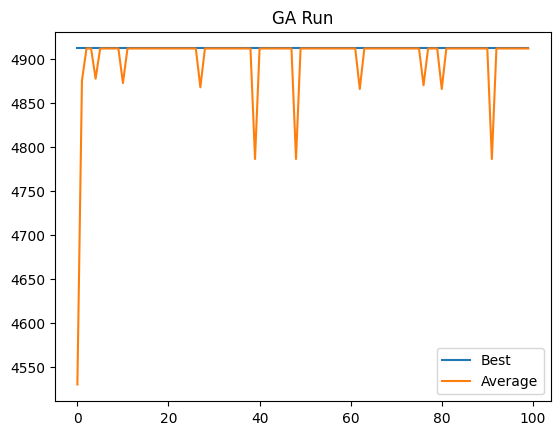

The maximum knapsack weight limit is: 31181


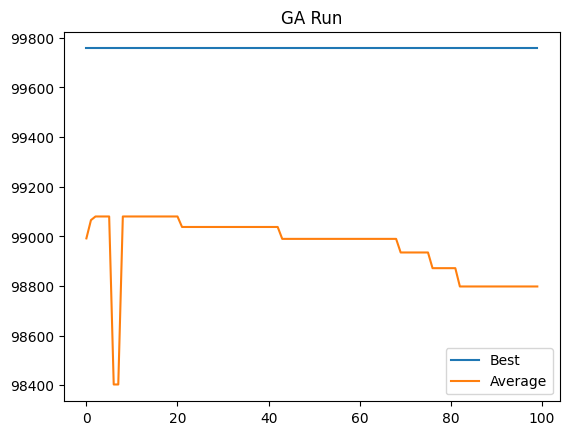

The maximum knapsack weight limit is: 100000


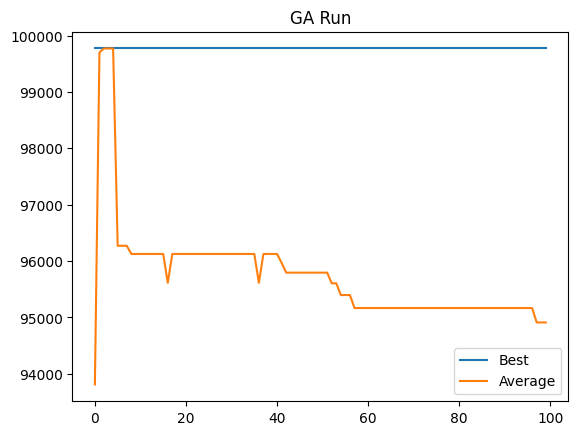

The maximum knapsack weight limit is: 100000


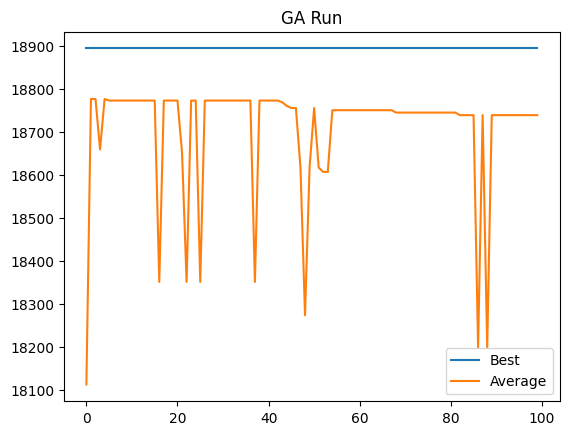

The maximum knapsack weight limit is: 58181


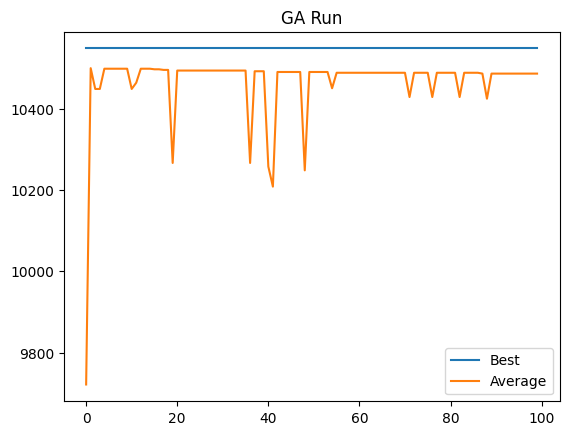

The maximum knapsack weight limit is: 341045


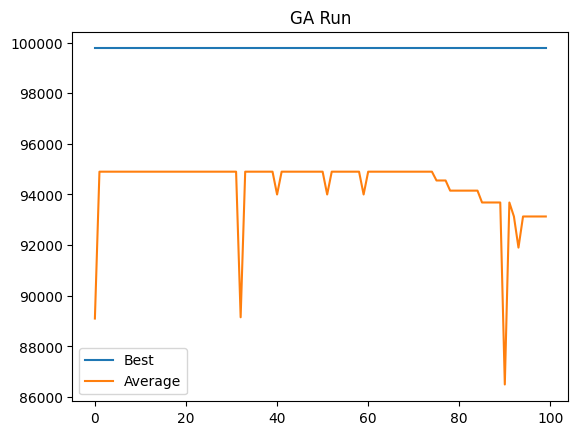

The maximum knapsack weight limit is: 100000


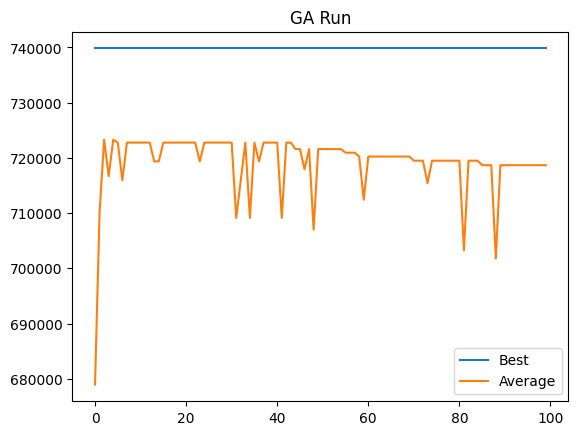

The maximum knapsack weight limit is: 104723596


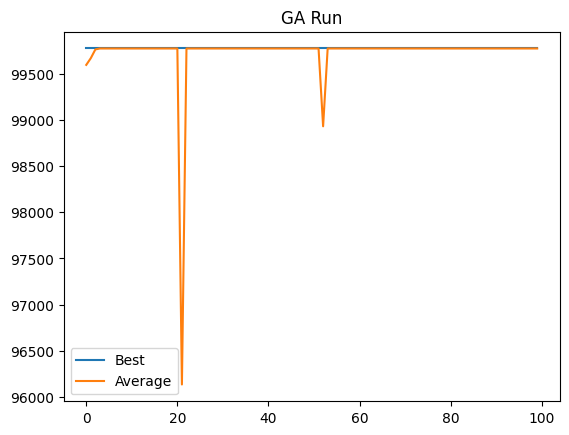

The maximum knapsack weight limit is: 100000


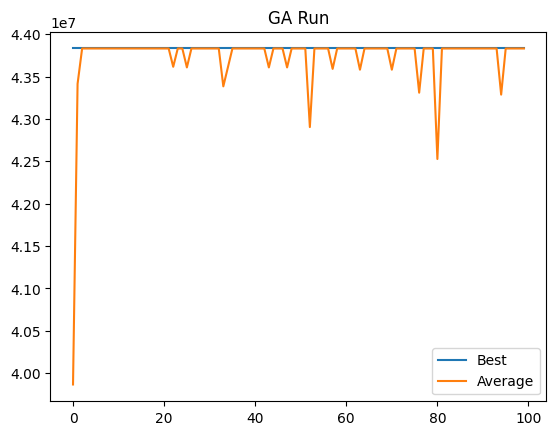

The maximum knapsack weight limit is: 106925262


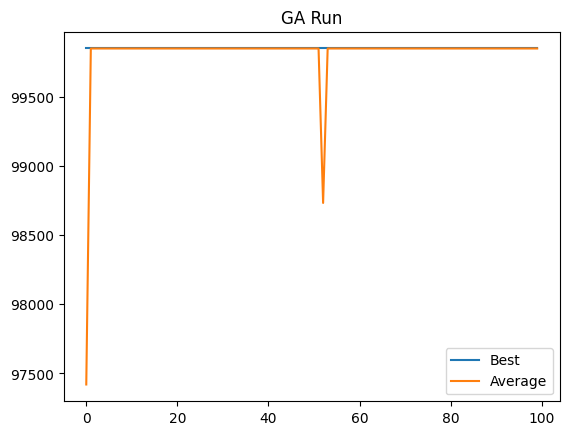

The maximum knapsack weight limit is: 100000


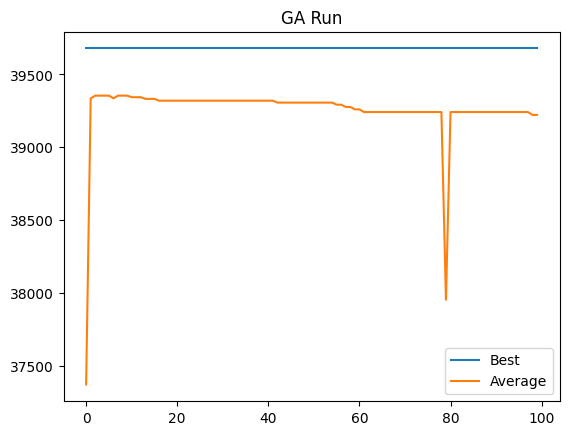

The maximum knapsack weight limit is: 4040184


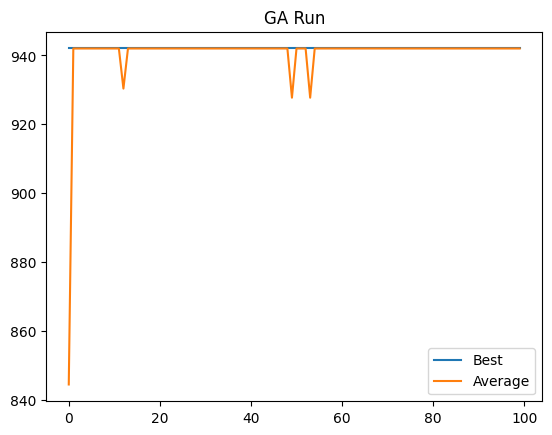

The maximum knapsack weight limit is: 9486367


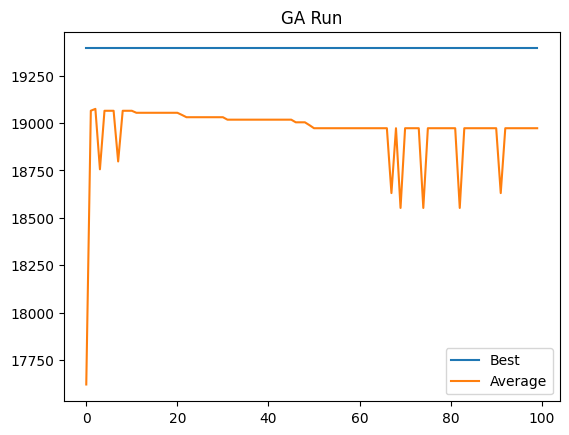

The maximum knapsack weight limit is: 50000


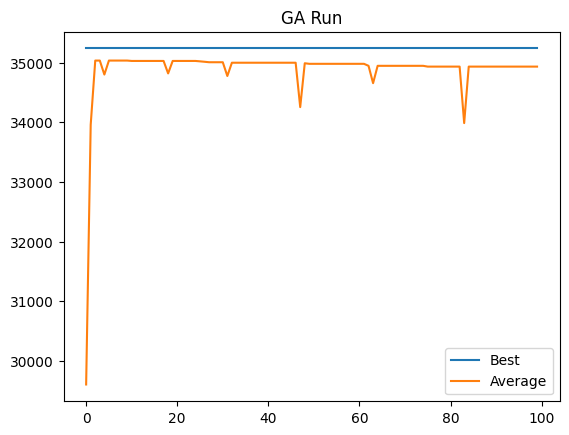

The maximum knapsack weight limit is: 100000


In [57]:
PI_sizes = [4, 19, 30, 40, 45, 50, 60, 82, 100, 106, 200, 300, 400, 500,
1000]
k_limits = [0]*len(PI_sizes)
bestRules, bestSolutions, bestEvaluations = ([] for i in range(3))
for i in range(len(PI_sizes)):
    if k_limits[i] == 0:
        type = 'Library'
    else:
        type = 'Random'
    PI, k_limit = instances(PI_sizes[i], k_limits[i])
    bestRule, bestEval, bestSol, wholeEval = geneticAlgorithm(PI, 100, 100, 
    0.001, 0.001, k_limit, 3, 8)
    wholeEval = (k_limit, wholeEval[0], wholeEval[1], wholeEval[2])
    bestRules.append(bestRule)
    bestSolutions.append(bestSol)
    bestEvaluations.append(wholeEval)
# Folder to save results
os.chdir(r"C:\Users\xedua\OneDrive\Escritorio\MCC-I\Semester_2\Research\Results")
df = pd.DataFrame(bestEvaluations, columns = ['Knapsack_Limit','Best_Profits',
'Best_Weights', 'Knapsack_State'])
df.index = PI_sizes
df.index.names = ['Problem Instance']
df.to_csv(f'Results_GACA_{type}_Multi_SelectedPI.csv', encoding='utf-8')
# Folder for the problem instances library
os.chdir(r"C:\Users\xedua\OneDrive\Escritorio\MCC-I\Semester_2\Research\KP instances") 